#NAME : BRAHIM OUHAMMOU





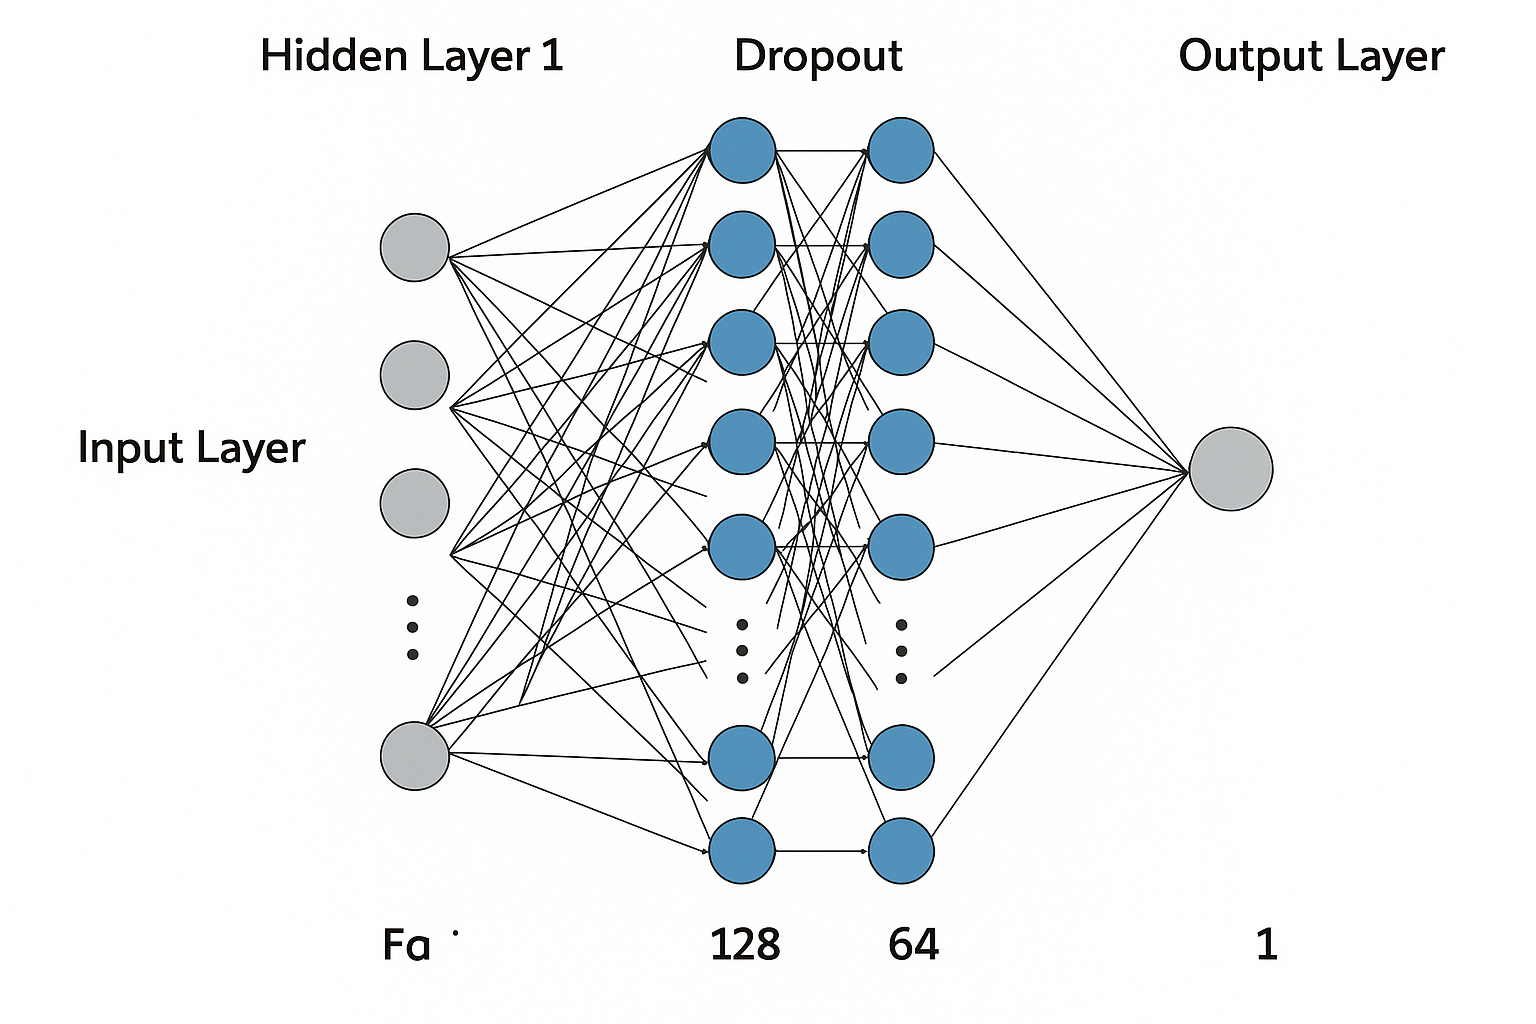

In [117]:
from IPython.display import Image, display

display(Image(filename='/content/Artificial Neural Network Diagram.png'))


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [119]:
df = pd.read_csv('home_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7.0,1180.0,0.0,1955.0,0.0,98178,47.511234,-122.256775,1340.0,5650.0
1,6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7.0,2170.0,400.0,1951.0,1991.0,98125,47.721023,-122.318862,1690.0,7639.0
2,5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6.0,770.0,0.0,1933.0,0.0,98028,47.737927,-122.233196,2720.0,8062.0
3,2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7.0,1050.0,910.0,1965.0,0.0,98136,47.520820,-122.393185,1360.0,5000.0
4,1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8.0,1680.0,0.0,1987.0,0.0,98074,47.616812,-122.044901,1800.0,7503.0


#Top zipcode by average price


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  float64
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  float64
 15  yr_renovated   21613 non-null  float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [121]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140825,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155933,-122.518648,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328154,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571794,-122.230495,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677985,-122.124764,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777624,-121.315091,6210.000000,871200.000000


In [122]:
zip_avg = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)
print("Top zipcode by average price:\n", zip_avg.head(5))

Top zipcode by average price:
 zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012582e+05
Name: price, dtype: float64


#Fraction of houses with sqft_living between 2000 and 4000


In [123]:
filtered = df[(df['sqft_living'] >= 2000) & (df['sqft_living'] <= 4000)]
fraction = len(filtered) / len(df)
print(f"Fraction between 2000 and 4000 sqft: {fraction:.4f}")

Fraction between 2000 and 4000 sqft: 0.4266


#Scatter plot: sqft_living vs price

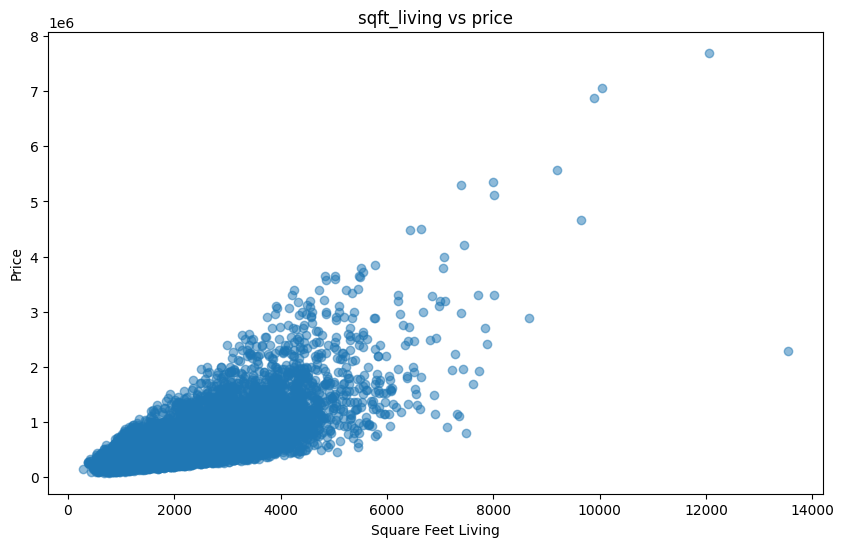

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.title("sqft_living vs price")
plt.show()

#Boxplot of house prices by zipcode

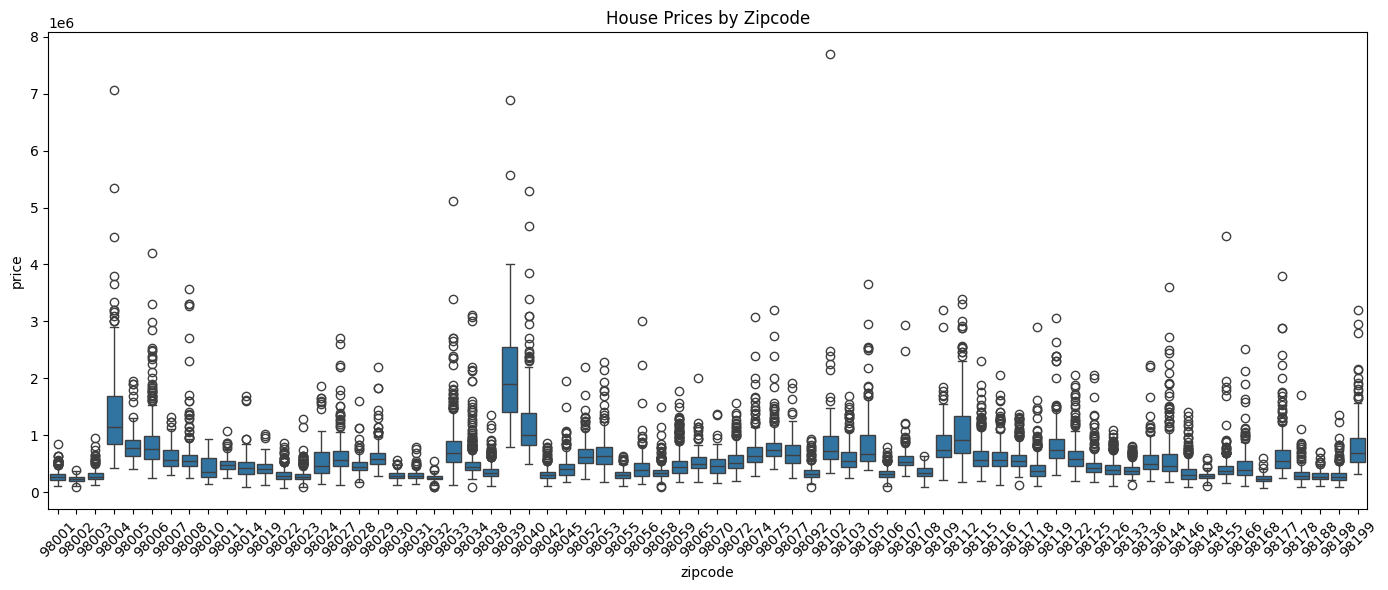

In [125]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='zipcode', y='price', data=df)
plt.title('House Prices by Zipcode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Preprocessing

In [126]:
features = [
    'bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode',
    'condition','grade','waterfront','view','sqft_above','sqft_basement',
    'yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'
]
target = 'price'



In [127]:

X = df[features]
y = df[target]

print("Features:\n", X.head())
print("\n\n ------------------------------------------------------ \n\n")
print("\nTarget:\n", y.head())



Features:
    bedrooms  bathrooms  sqft_living  sqft_lot  floors  zipcode  condition  \
0       3.0       1.00       1180.0    5650.0     1.0    98178          3   
1       3.0       2.25       2570.0    7242.0     2.0    98125          3   
2       2.0       1.00        770.0   10000.0     1.0    98028          3   
3       4.0       3.00       1960.0    5000.0     1.0    98136          5   
4       3.0       2.00       1680.0    8080.0     1.0    98074          3   

   grade  waterfront  view  sqft_above  sqft_basement  yr_built  yr_renovated  \
0    7.0           0     0      1180.0            0.0    1955.0           0.0   
1    7.0           0     0      2170.0          400.0    1951.0        1991.0   
2    6.0           0     0       770.0            0.0    1933.0           0.0   
3    7.0           0     0      1050.0          910.0    1965.0           0.0   
4    8.0           0     0      1680.0            0.0    1987.0           0.0   

         lat        long  sqft_living15

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 18)
X_test shape: (4323, 18)
y_train shape: (17290,)
y_test shape: (4323,)


In [129]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['zipcode']


print("Numeric Features:\n", numeric_features)
print("\n\n ------------------------------------------------------ \n\n")
print("\nCategorical Features:\n", categorical_features)

Numeric Features:
 ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


 ------------------------------------------------------ 



Categorical Features:
 ['zipcode']


In [130]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
], remainder='drop')

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print(X_train_proc)
print(X_test_proc)

print("\n\n ------------------------------------------------------ \n\n")

print("X_train_proc shape:", X_train_proc.shape)
print("X_test_proc shape:", X_test_proc.shape)

[[-0.39526335 -0.47445144 -0.32393262 ...  0.          0.
   0.        ]
 [-1.46896378 -1.45258323 -1.18365301 ...  0.          0.
   0.        ]
 [-0.39526335 -1.45258323 -1.09547656 ...  0.          0.
   0.        ]
 ...
 [-0.39526335  0.50368036  0.05081729 ...  0.          0.
   0.        ]
 [-2.54266422 -1.77862716 -1.8670205  ...  0.          0.
   0.        ]
 [ 0.67843709  0.50368036  1.16404497 ...  0.          0.
   0.        ]]
[[ 0.67843709  0.17763643 -0.00429299 ...  0.          0.
   0.        ]
 [ 1.75213752  1.15576822  0.91053768 ...  0.          0.
   0.        ]
 [ 0.67843709  0.50368036  1.86945657 ...  0.          0.
   0.        ]
 ...
 [ 0.67843709  0.50368036  0.39690986 ...  0.          0.
   0.        ]
 [ 0.67843709 -0.47445144  0.19410402 ...  0.          0.
   0.        ]
 [ 0.67843709  0.50368036  0.54680982 ...  0.          0.
   0.        ]]


 ------------------------------------------------------ 


X_train_proc shape: (17290, 88)
X_test_proc shape: 

#Build Neural Network Model

In [131]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_proc.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        11,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,713 (77.00 KB)

 Trainable params: 19,713 (77.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [132]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)


#Train the Model

In [133]:
history = model.fit(
    X_train_proc, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 288079478784.0000 - mae: 415255.4375 - val_loss: 41647906816.0000 - val_mae: 146461.3281
Epoch 2/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44518309888.0000 - mae: 141251.3438 - val_loss: 25710514176.0000 - val_mae: 106391.4219
Epoch 3/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 32444178432.0000 - mae: 114364.4375 - val_loss: 20550498304.0000 - val_mae: 93369.0781
Epoch 4/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31177971712.0000 - mae: 104732.4531 - val_loss: 19065100288.0000 - val_mae: 89121.3047
Epoch 5/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27611877376.0000 - mae: 101587.6172 - val_loss: 16990538752.0000 - val_mae: 81967.2344
Epoch 6/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26764025856.0000 - mae: 97973.0859 - val_loss: 16569152512.0000 - val_mae: 81510.3203
Epoch 7/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23800068096.0000 - mae: 96629.0000 - val_loss: 164356485

[169588965376.0, 41407504384.0, 32219834368.0, 28604014592.0, 26285258752.0, 26281887744.0, 24477126656.0, 24535875584.0, 23486943232.0, 23748272128.0, 22873444352.0, 22498265088.0, 22391611392.0, 21434228736.0, 21703239680.0, 21055830016.0, 21877688320.0, 21467224064.0, 20885929984.0, 20533438464.0, 21023655936.0, 21041844224.0, 19756285952.0, 19901337600.0, 19581184000.0, 20406624256.0, 19125342208.0, 20100554752.0, 20169805824.0, 20129904640.0, 19629883392.0, 19774810112.0, 19678801920.0, 19631292416.0, 19216123904.0, 19684638720.0, 19367833600.0, 19008923648.0, 18424971264.0, 19157532672.0, 18552418304.0, 18914775040.0, 18703751168.0, 19651041280.0, 18276671488.0, 18595051520.0, 18597259264.0, 19036981248.0, 18636386304.0, 19008378880.0]
[287531.9375, 131983.203125, 111010.0078125, 102458.796875, 98872.4921875, 97581.7421875, 95907.8125, 95623.34375, 94368.0078125, 94119.2578125, 93442.421875, 92418.9375, 92018.4296875, 91659.0234375, 91245.8125, 90940.7578125, 91343.1640625, 91011

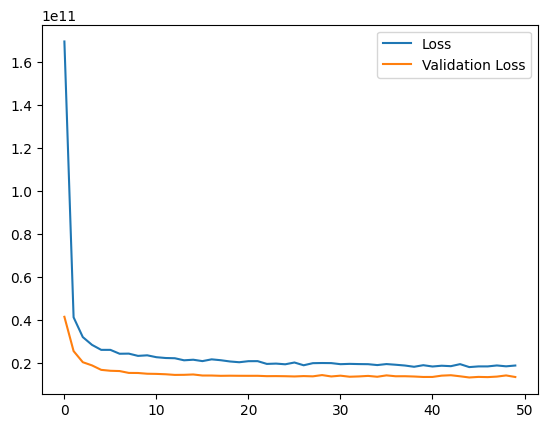

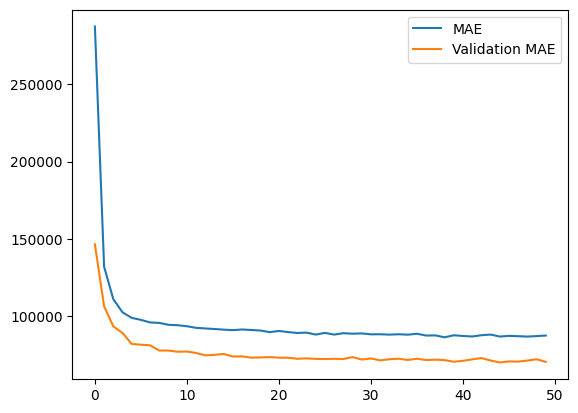

In [134]:

print(history.history['loss'])

print(history.history['mae'])

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.show()


#Evaluate the Model

In [135]:
loss, mae = model.evaluate(X_test_proc, y_test, verbose=0)
print(f"Test Mean Absolute Error: ${mae:,.2f}")

Test Mean Absolute Error: $74,333.22


#Plot Training History

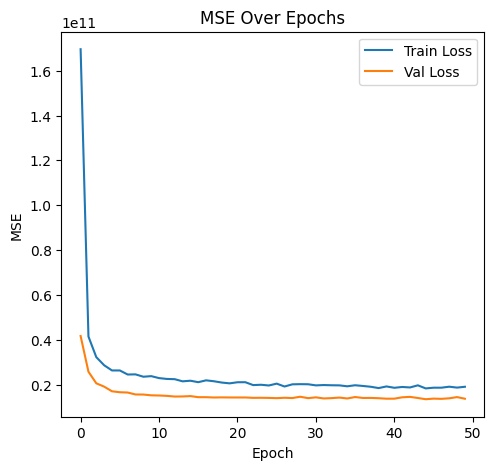

In [136]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MSE Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

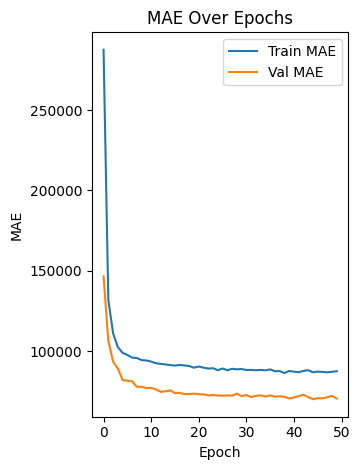

In [137]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("MAE Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.show()

#Prediction Function

In [138]:
def predict_price(house_dict):
    house_df = pd.DataFrame([house_dict])
    house_proc = preprocessor.transform(house_df)
    prediction = model.predict(house_proc)[0, 0]
    return prediction

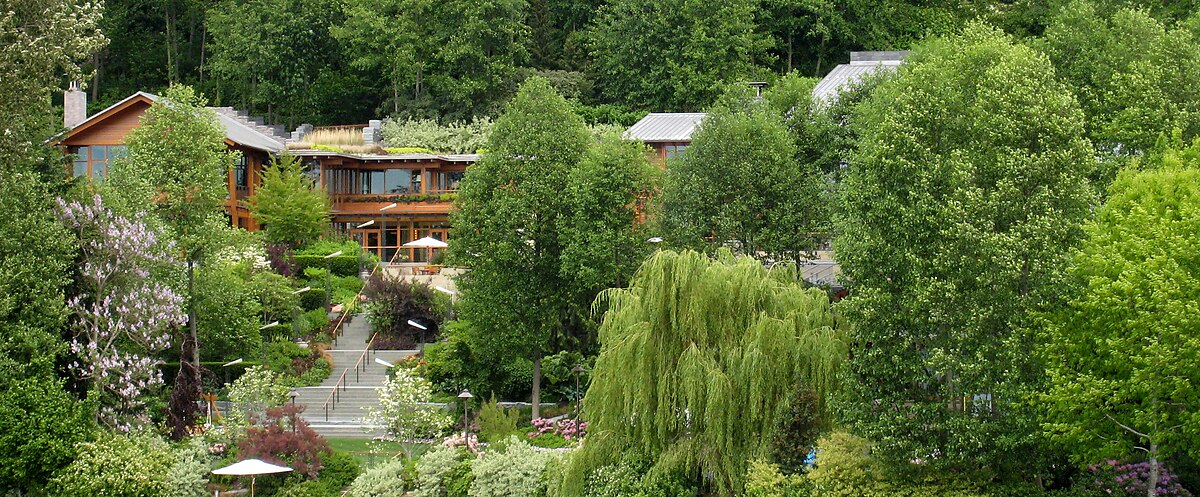

In [139]:
from IPython.display import Image, display

display(Image(filename='/content/Residence_of_Bill_Gates.jpg'))


#Prediction

In [140]:
bill_gates_house = {
    'bedrooms': 8,
    'bathrooms': 25,
    'sqft_living': 50000,
    'sqft_lot': 225000,
    'floors': 4,
    'zipcode': 98039,
    'condition': 10,
    'grade': 10,
    'waterfront': 1,
    'view': 4,
    'sqft_above': 37500,
    'sqft_basement': 12500,
    'yr_built': 1994,
    'yr_renovated': 2010,
    'lat': 47.627606,
    'long': -122.242054,
    'sqft_living15': 5000,
    'sqft_lot15': 40000
}

In [141]:
predicted_price = predict_price(bill_gates_house)
print(f"Predicted price for custom house: ${predicted_price:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted price for custom house: $22,223,104.00
